<a href="https://colab.research.google.com/github/Mateus929/Facial-Expression-Recognition-Challenge/blob/main/notebooks/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation: Mounting Google Drive

As a first step, this notebook demonstrates how to mount your Google Drive to access files stored there.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading and Initial Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
# Note: Make sure the file path is correct and the file exists in your Google Drive.
# The path should be '/content/drive/MyDrive/Colab Notebooks/Facial Expression Recognition Challenge/data/your_data_file.csv'
# Replace 'your_data_file.csv' with the actual name of your training data file.
try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Facial Expression Recognition Challenge/data/train.csv') # Assuming the training data is in a CSV file named 'train.csv'
    print("Training data loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print("Error: The training data file was not found. Please check the file path and name.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

Training data loaded successfully!


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


# Basic Data Analysis

## Basic Information

Let's start by getting some basic information about the dataset, such as the number of rows and columns, and the data types of each column.

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28709 non-null  int64 
 1   pixels   28709 non-null  object
dtypes: int64(1), object(1)
memory usage: 448.7+ KB


None

## Missing Values Analysis

Now, let's check for missing values in the dataset and visualize their distribution.

In [8]:
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


,0
emotion,0
pixels,0


## Summary Statistics

Next, let's look at the summary statistics for the numerical columns in the dataset.

In [6]:
display(df.describe())

,emotion
count,28709.000000
mean,3.317427
std,1.876632
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


## Target Distribution

Finally, let's examine the distribution of the target variable, which is the 'emotion' column.

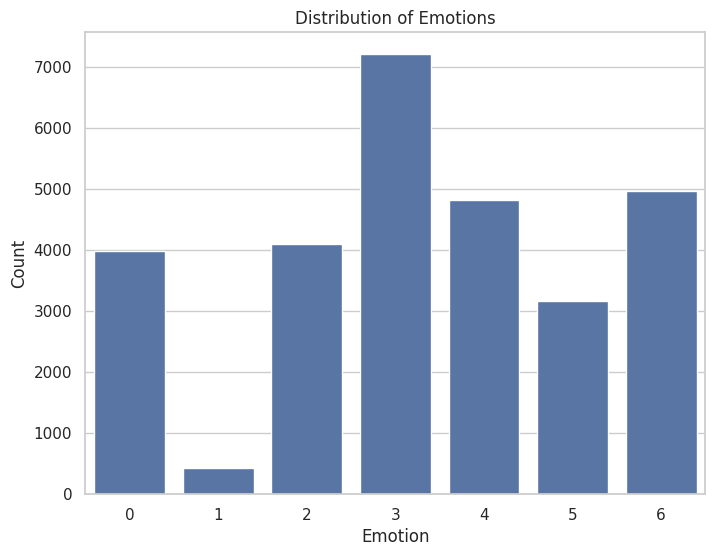


Emotion distribution counts:


,count
emotion,
3,7215
6,4965
4,4830
2,4097
0,3995
5,3171
1,436


In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='emotion', data=df)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

print("\nEmotion distribution counts:")
display(df['emotion'].value_counts())

# Data Visualization: Displaying Sample Images

Let's process the 'pixels' column to visualize some sample images from the dataset.

In [17]:
def process_pixels(pixel_string):
    pixels = np.array(pixel_string.split(' '), dtype='int64')
    return pixels.reshape(48, 48)

df['image'] = df['pixels'].apply(process_pixels)

print("Sample of processed image data:")
display(df['image'].head())

Sample of processed image data:


,image
0,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."


Now, let's display a few sample images along with their corresponding emotions.

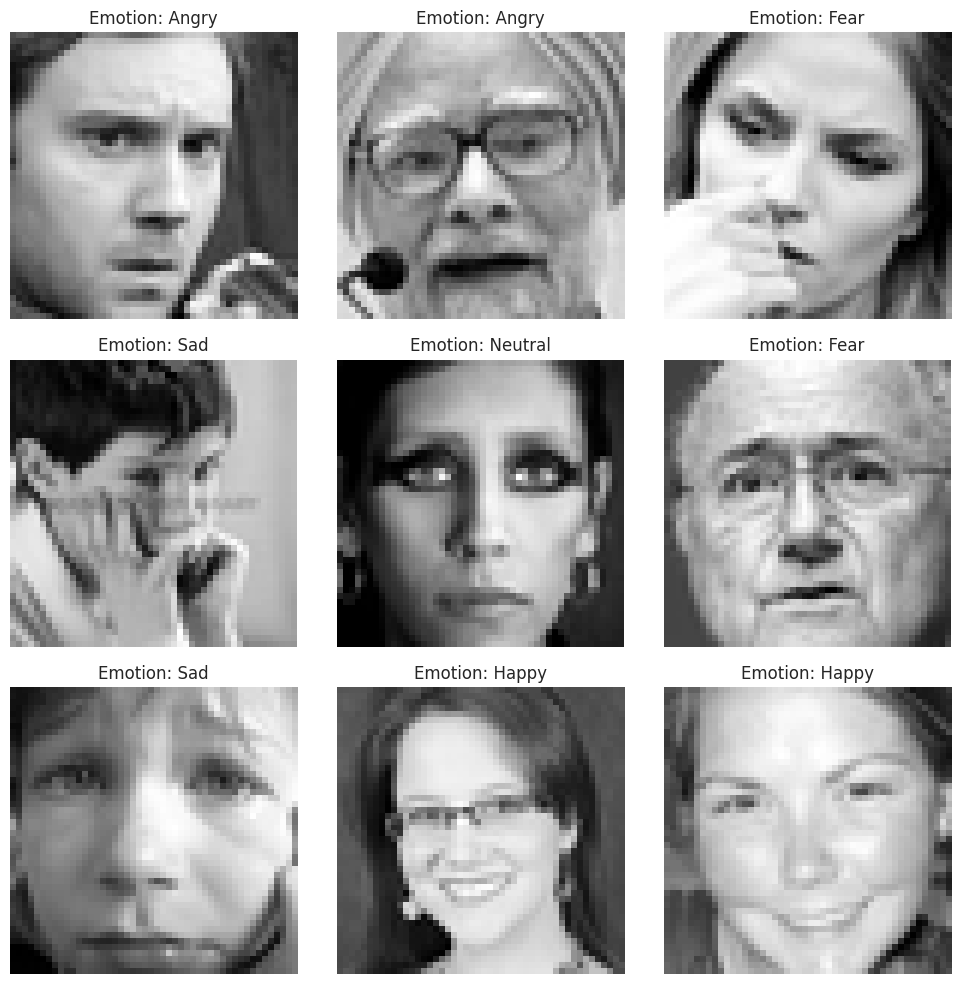

In [16]:
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(df['image'][i], cmap='gray')
    emotion = df['emotion'][i]
    plt.title(f"Emotion: {emotion_labels[emotion]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Image Tensor Conversion (for PyTorch)

Here's how you can convert the image data into a PyTorch tensor format, which is suitable for use with PyTorch models.

In [15]:
import torch

image_np = df['image'][0]
image_tensor = torch.from_numpy(image_np).unsqueeze(0).unsqueeze(0).float()

print(f"Original NumPy array shape: {image_np.shape}")
print(f"PyTorch tensor shape (C, H, W): {image_tensor.shape}")
print(f"PyTorch tensor shape (N, C, H, W) for a batch: {image_tensor.unsqueeze(0).shape}")

Original NumPy array shape: (48, 48)
PyTorch tensor shape (C, H, W): torch.Size([1, 1, 48, 48])
PyTorch tensor shape (N, C, H, W) for a batch: torch.Size([1, 1, 1, 48, 48])
